In [1]:
#adicionar 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import os

cwd = os.getcwd() 
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Catarina Rodrigues\\Desktop\\EDSB': ['.git', 'Analise_Catarina.ipynb', 'HR_DS.csv', 'Projecto.ipynb']


In [3]:
data=pd.read_csv('c:\\Users\\Catarina Rodrigues\\Desktop\\EDSB\\HR_DS.csv')

In [122]:
pd.set_option('display.max_columns', 40)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Definir perguntas para responder
Story 

Data Preparation/Clean

In [11]:
data.describe()
#Checking the Null Values
pd.set_option('display.max_rows', 200)
#data.isnull().sum() #no null values
#data.info()

#check for  duplicate records and have the unique records to be included into your dataset:
#data[data.duplicated()] #zero duplicated

In [ ]:
#Over18 : ['Y']
#Y    1470
#so tem um unico valor, por isso vou apagar por ser inutil
#data['StandardHours'].unique() tambem so tem 1 valor, que é sempre 80
#data['EmployeeCount'].unique() tambem so tem 1 valor, que é 1

#não trazem valor 

data=data.drop('Over18', axis=1)
data=data.drop('StandardHours', axis=1)
data=data.drop('EmployeeCount', axis=1)

In [7]:
#ver os data types e ver os seus valores unicos

for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_______________________________________________________________')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________________________
Gender : ['Fema

In [ ]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.int64:
            continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [12]:
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Analise descritiva dos dados-Gráficos


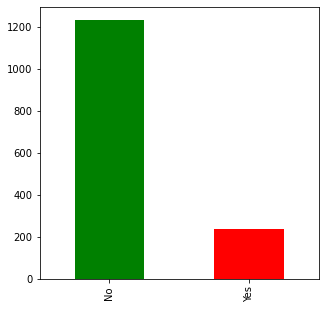

In [14]:
#Analise das varivaies categorcias vs attrition
plt.subplots(figsize=(5,5))
data['Attrition'].value_counts(normalize = True)
data['Attrition'].value_counts(dropna = False).plot.bar(color=['green','red'])
plt.show()


<AxesSubplot:xlabel='Age', ylabel='count'>

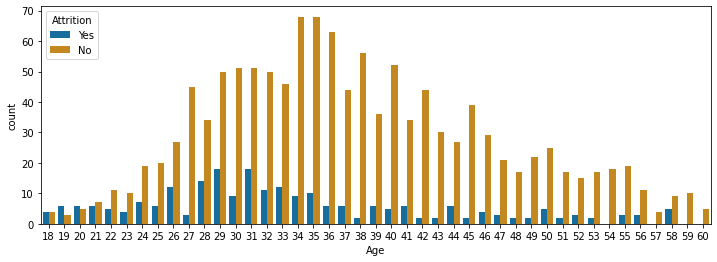

In [6]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=data, palette='colorblind')

#malta dos 35/36 anos está toda empregada
#29 e 31 a malta está a sair

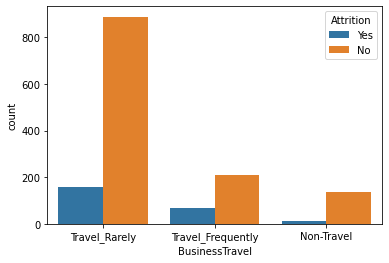

In [28]:
sns.countplot(hue=data.Attrition, x=data.BusinessTravel)
plt.show()

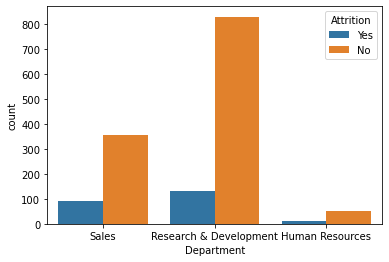

In [20]:
#Departamento na razão de saida
sns.countplot(hue=data.Attrition, x=data.Department)
plt.show()

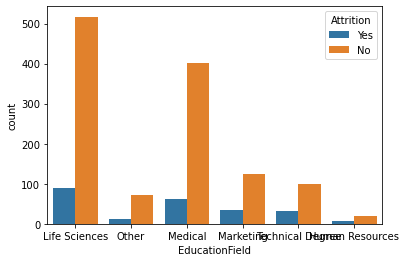

In [29]:
sns.countplot(hue=data.Attrition, x=data.EducationField)
plt.show()

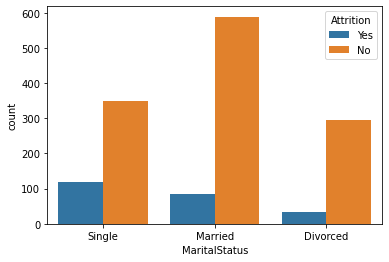

In [22]:
sns.countplot(hue=data.Attrition, x=data.MaritalStatus)
plt.show()

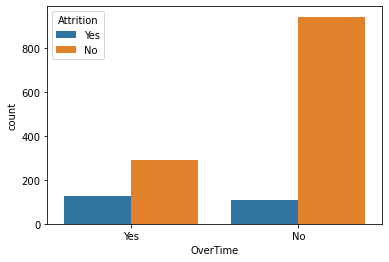

In [23]:
sns.countplot(hue=data.Attrition, x=data.OverTime)
plt.show()

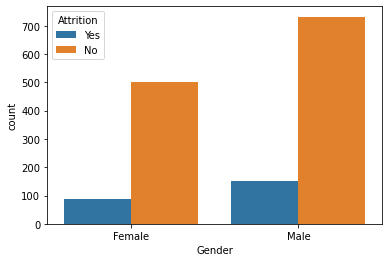

In [24]:
sns.countplot(hue=data.Attrition, x=data.Gender)
plt.show()

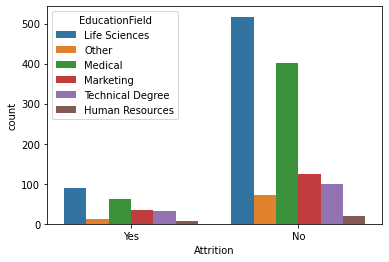

In [31]:
sns.countplot(x=data.Attrition, hue=data.EducationField)
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

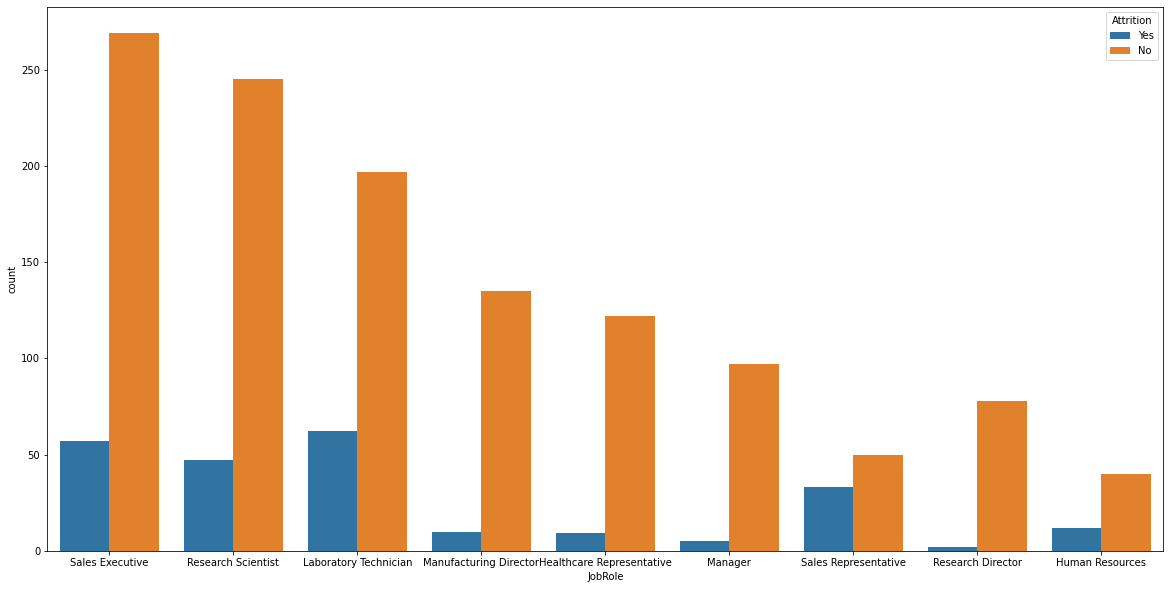

In [33]:
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole', hue='Attrition', data=data)

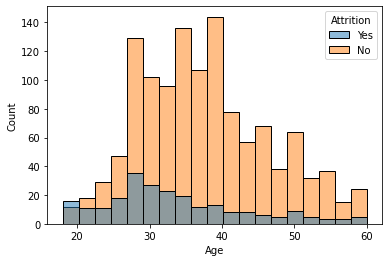

In [34]:
sns.histplot(hue=data.Attrition, x=data.Age)
plt.show()

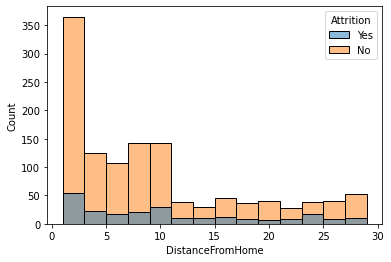

In [36]:
sns.histplot(hue=data.Attrition, x=data.DistanceFromHome)
plt.show()

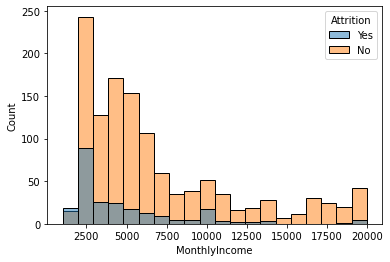

In [38]:
sns.histplot(x=data.MonthlyIncome, hue=data.Attrition)
plt.show()

Modelo Preditivo/

In [ ]:
# ver a correlação dos dados
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='0.0%')

Clustering/Unsupervising 